In [11]:
import numpy as np
import tensorflow as tf

from matplotlib import pyplot as plt


In [12]:
data = tf.keras.utils.image_dataset_from_directory('/content/drive/MyDrive/monkeypoxdiseases/dataset')

Found 3192 files belonging to 2 classes.


In [13]:
data_iterator = data.as_numpy_iterator()

In [14]:
batch = data_iterator.next()

In [15]:
# Image represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [16]:
batch[1]

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int32)

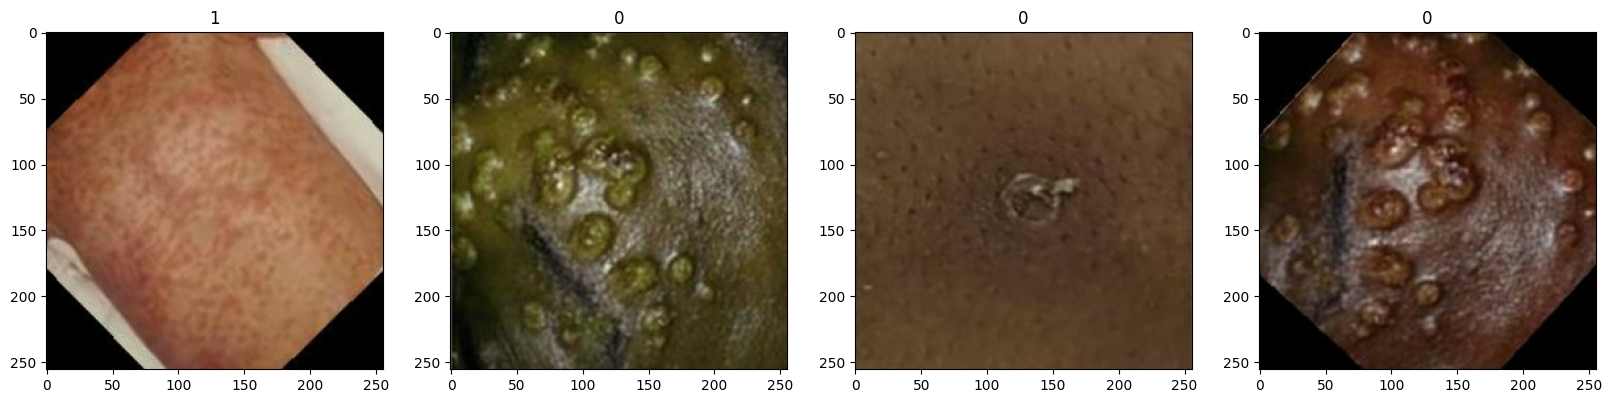

In [18]:
fig, ax = plt.subplots(ncols=4,figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

In [19]:
scaled = batch[0]/255

In [20]:
scaled.max()

1.0

**1. Scale Data**


In [21]:
data = data.map(lambda x,y: (x/255, y))

In [22]:
scaled_iterator = data.as_numpy_iterator()

In [23]:
batch = scaled_iterator.next()

In [24]:
batch[0].max()

1.0

**2. Split Data**

In [25]:
len(data)

100

In [29]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [30]:
train_size + val_size+ test_size

100

In [31]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [32]:
len(test)

10

**Deep Learning Model**

**1. Built Deep Learning Model**

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Dense,Flatten

In [34]:
model = Sequential()

In [35]:
model.add(Conv2D(16,(3,3),1,activation ='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation ='relu'))
model.add(Dense(1,activation='sigmoid'))

In [36]:
model.compile('adam',loss = tf.losses.BinaryCrossentropy(),metrics =['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 16)        0

**1. Train**

In [38]:
logdir ='model'

In [39]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [40]:
hist = model.fit(train,epochs = 20,validation_data = val,callbacks= [tensorboard_callback])

Epoch 1/20
70/70 [==============================] - 547s 8s/step - loss: 0.6650 - accuracy: 0.6304 - val_loss: 0.6270 - val_accuracy: 0.6531
Epoch 2/20
70/70 [==============================] - 170s 2s/step - loss: 0.6165 - accuracy: 0.6522 - val_loss: 0.5983 - val_accuracy: 0.6891
Epoch 3/20
70/70 [==============================] - 170s 2s/step - loss: 0.5445 - accuracy: 0.7281 - val_loss: 0.4560 - val_accuracy: 0.7891
Epoch 4/20
70/70 [==============================] - 169s 2s/step - loss: 0.4464 - accuracy: 0.7875 - val_loss: 0.4956 - val_accuracy: 0.7766
Epoch 5/20
70/70 [==============================] - 168s 2s/step - loss: 0.4638 - accuracy: 0.7830 - val_loss: 0.4852 - val_accuracy: 0.7844
Epoch 6/20
70/70 [==============================] - 169s 2s/step - loss: 0.3635 - accuracy: 0.8397 - val_loss: 0.4256 - val_accuracy: 0.8234
Epoch 7/20
70/70 [==============================] - 169s 2s/step - loss: 0.3430 - accuracy: 0.8473 - val_loss: 0.4449 - val_accuracy: 0.8203
Epoch 8/20
70

In [41]:
hist.history

{'loss': [0.6650059223175049,
  0.6164681315422058,
  0.544468879699707,
  0.4463980197906494,
  0.4638187289237976,
  0.36349034309387207,
  0.3430343270301819,
  0.27124881744384766,
  0.3143247663974762,
  0.16735941171646118,
  0.14146336913108826,
  0.10722239315509796,
  0.12574666738510132,
  0.09984259307384491,
  0.07779881358146667,
  0.05615624040365219,
  0.06472793966531754,
  0.0435134656727314,
  0.07079631835222244,
  0.0315534844994545],
 'accuracy': [0.6303571462631226,
  0.6522321701049805,
  0.7281249761581421,
  0.7875000238418579,
  0.7830356955528259,
  0.8397321701049805,
  0.8473214507102966,
  0.8866071701049805,
  0.8629464507102966,
  0.9410714507102966,
  0.9482142925262451,
  0.9633928537368774,
  0.9535714387893677,
  0.9629464149475098,
  0.9745535850524902,
  0.9776785969734192,
  0.9790178537368774,
  0.9848214387893677,
  0.9763392806053162,
  0.9892857074737549],
 'val_loss': [0.6269868612289429,
  0.5982578992843628,
  0.45603495836257935,
  0.49560

**3.Plot Performance**

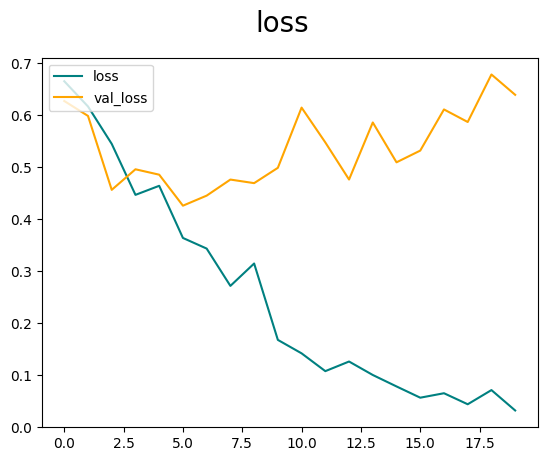

In [42]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('loss',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

4. Evaluate Performance

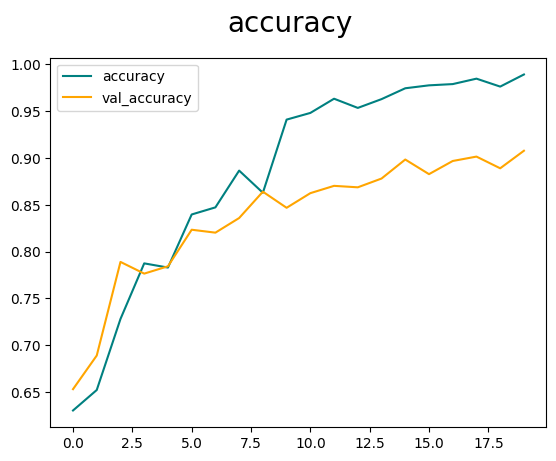

In [43]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('accuracy',fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

In [44]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [45]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [46]:
len(test)

10

In [47]:
for batch in test.as_numpy_iterator():
  X,y = batch
  yhat = model.predict(X)
  pre.update_state(y,yhat)
  re.update_state(y,yhat)
  acc.update_state(y,yhat)

1/1 [==============================] - 1s 701ms/step


In [48]:
print(f'Precision:{pre.result().numpy()},Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:0.8638743162155151,Recall:0.8776595592498779,Accuracy:0.8429487347602844


**Test**

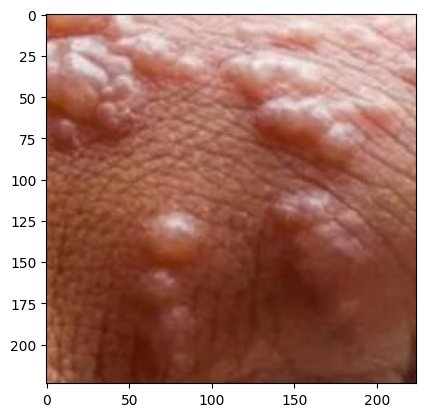

In [54]:
import cv2
img = cv2.imread('/content/drive/MyDrive/monkeypoxdiseases/M19_01.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

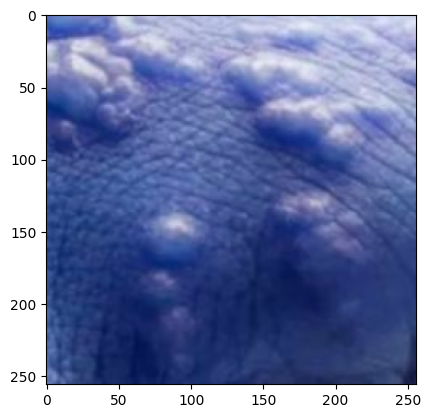

In [55]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
np.expand_dims(resize,0).shape

(1, 256, 256, 3)

In [57]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 62ms/step


In [58]:
if yhat>0.5:
  print(f'Predicted model is Other Disease')
else:
  print(f'Predicted model is Monkeypox')

Predicted model is Monkeypox


**Save Model**

In [59]:
from tensorflow.keras.models import load_model

In [61]:
model.save(os.path.join('/content/drive/MyDrive/monkeypoxdiseases/model','monkeypox.h5'))

In [63]:
new_model = load_model(os.path.join('/content/drive/MyDrive/monkeypoxdiseases/model','monkeypox.h5'))

In [64]:
yhatnew = new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 101ms/step


In [65]:
if yhat>0.5:
  print(f'Predicted model is Other Disease')
else:
  print(f'Predicted model is monkeypox')

Predicted model is monkeypox
